In [14]:
from crawlling import *
from utils import * 
import pandas as pd
from text_cleaning import *

In [15]:
STORE_FILE_PATH= 'D:\\02-yscec\\2020-1\\DataVisualization\\final-term\\source_data\\show\\'
PREPROCESSING_PATH='D:\\02-yscec\\2020-1\\DataVisualization\\final-term\\preprocess_data\\'

In [16]:
file_list = file_list_in_directory(STORE_FILE_PATH)

In [17]:
file = STORE_FILE_PATH + file_list[0]

In [18]:
file

'D:\\02-yscec\\2020-1\\DataVisualization\\final-term\\source_data\\show\\ariana_grande-7rings.csv'

In [19]:
df = pd.read_csv(file)
# df.insert(len(df.columns), 'language', '')
df

,author,contents,likeCount,date,hangul
0,Ronita K.,wtf alr a year it felt way less than a year ti...,0,2020-05-06T17:56:40.000Z,False
1,KITTY EMCIA !,i love it,0,2020-05-06T17:50:26.000Z,False
2,Paolosannicandro,#lovearianagrande,0,2020-05-06T17:47:34.000Z,False
3,NOOBS# world,I see it \nI like it \nI want it\nI stole it\n...,2,2020-05-06T17:45:30.000Z,False
4,Maria Chiquinquirá Ferrer Quintero,I think I'm the puppy in the whole song XD,0,2020-05-06T17:44:41.000Z,False
...,...,...,...,...,...
20095,Manvel Levonyan,Me listening to this song wearing headphones w...,0,2020-01-30T11:09:34Z,False
20096,Isabella Novoa,☺😁😁😁,1,2020-01-30T11:03:40Z,False
20097,Mami Ralte,👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍nonoi ka nia miz...,1,2020-01-30T11:03:31Z,False
20098,O_O -_-,2020？,1,2020-01-30T11:01:56Z,False


In [20]:
# refine sentence (remove letters without hangul and english)
for idx, row in df.iterrows():
    s = refine_sentence(row.contents)
    
    if len(s.strip()) != 0:
        df.at[idx, 'contents'] = s
    else:
        df.drop(idx, inplace=True)

In [21]:
df

,author,contents,likeCount,date,hangul
0,Ronita K.,wtf alr a year it felt way less than a year ti...,0,2020-05-06T17:56:40.000Z,False
1,KITTY EMCIA !,i love it,0,2020-05-06T17:50:26.000Z,False
2,Paolosannicandro,lovearianagrande,0,2020-05-06T17:47:34.000Z,False
3,NOOBS# world,I see it I like it I want itI stole itNow Im i...,2,2020-05-06T17:45:30.000Z,False
4,Maria Chiquinquirá Ferrer Quintero,I think Im the puppy in the whole song XD,0,2020-05-06T17:44:41.000Z,False
...,...,...,...,...,...
20094,slytherin blood,You will miss your materialistic shiiit in you...,1,2020-01-30T11:11:15Z,False
20095,Manvel Levonyan,Me listening to this song wearing headphones w...,0,2020-01-30T11:09:34Z,False
20097,Mami Ralte,nonoi ka nia mizoram,1,2020-01-30T11:03:31Z,False
20098,O_O -_-,2020,1,2020-01-30T11:01:56Z,False


In [22]:
df.to_csv(PREPROCESSING_PATH + file_list[0], 
          sep=',',
          columns=['author', 'contents', 'likeCount', 'date', 'hangul'],
          encoding='utf-8-sig')

---

In [2]:
import konlpy

In [7]:
text = '아름다운 지민 좋아한다'

okt = konlpy.tag.Okt()

for word in okt.pos(text): 
    if word[1] in ['Adjective']: #명사, 동사, 형용사
        print(word[0])

아름다운
좋아한다


In [8]:
okt.pos(text)

[('아름다운', 'Adjective'), ('지민', 'Noun'), ('좋아한다', 'Adjective')]

In [12]:
import collections

text = '''
평창올림픽 입장권 판매율 93%·누적관중 54만명
등록 :2018-02-17 14:15수정 :2018-02-17 14:24
페이스북트위터공유스크랩프린트크게 작게
조직위, 17일 하루 최다 9만장 팔려
빈자리는 운영 인력과 자원봉사자로 채워
평창겨울올림픽 여자 아이스하키 단일팀 경기가 관객들로 만원을 이룬 모습. 강릉/연합뉴스
평창겨울올림픽 여자 아이스하키 단일팀 경기가 관객들로 만원을 이룬 모습. 강릉/연합뉴스
2018 평창겨울올림픽 누적 입장권 판매율이 93%를 기록했다.
평창겨울올림픽 조직위원회는 17일 강원도 평창 알펜시아 리조트 내 메인프레스센터에서 열린 국제올림픽위원회(IOC)와의 일일 공동 브리핑에서 “17일 오전 현재 목표치 106만8000장 중 99만1000장이 팔려 입장권 판매율이 92.8%로 올랐다”고 발표했다.
조직위는 특히 17일 경기 입장권 9만2000장 중 9만장이 이미 팔려 평창올림픽 개막 후 하루 최다 판매량을 기록했다고 밝혔다.
김동훈 기자 cano@hani.co.kr
원문보기: 
http://www.hani.co.kr/arti/society/society_general/832485.html#csidx84422124998e6d599763a4e971add95 
'''

okt = konlpy.tag.Okt()
words = okt.nouns(text)
d_frequency = collections.Counter(words)

#for word, frequency in d_frequency.items(): #모두
for word, frequency in d_frequency.most_common(5): #상위 5개
    print(word, frequency)      


평창 5
입장권 4
겨울 4
올림픽 4
판매 3


In [39]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [40]:
font_fname = 'C:\Windows\\fonts\\gulim.ttc'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

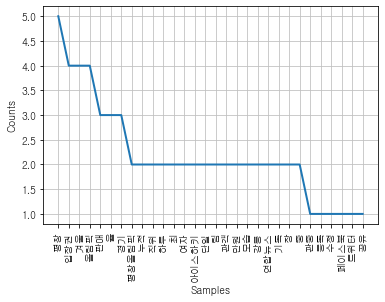

In [41]:
from nltk import Text

kolaw = Text(words, name="kolaw")
kolaw.plot(30)
plt.show()

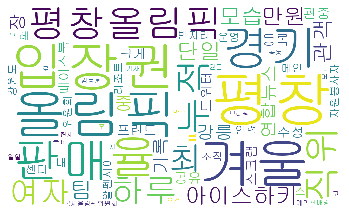

In [43]:
from wordcloud import WordCloud


wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
plt.axis("off")
plt.show()